In [2]:
%load_ext rpy2.ipython
%R library(dplyr); library(ggplot2);library(magrittr);library(tsne);library(dbscan); library(vegan)

//anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: permute

  res = super(Function, self).__call__(*new_args, **new_kwargs)
//anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: lattice

  res = super(Function, self).__call__(*new_args, **new_kwargs)


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


//anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: This is vegan 2.3-1

  res = super(Function, self).__call__(*new_args, **new_kwargs)


array(['vegan', 'lattice', 'permute', 'dbscan', 'tsne', 'magrittr',
       'ggplot2', 'dplyr', 'tools', 'stats', 'graphics', 'grDevices',
       'utils', 'datasets', 'methods', 'base'], 
      dtype='|S9')

In [3]:
%%R
phage_ortho<-read.csv("/Users/jmb/Desktop/NetworkFiles/data/orthomcl/phagevphage_orthomclmat.txt", sep="\t", header=TRUE)
rownames(phage_ortho)<-phage_ortho$organism
phage_ortho$organism<-NULL

#create distance matrix from phage orthologous protein matrix
pom<-as.matrix(phage_ortho)
pomd<-vegdist(pom, method="bray", binary=TRUE)

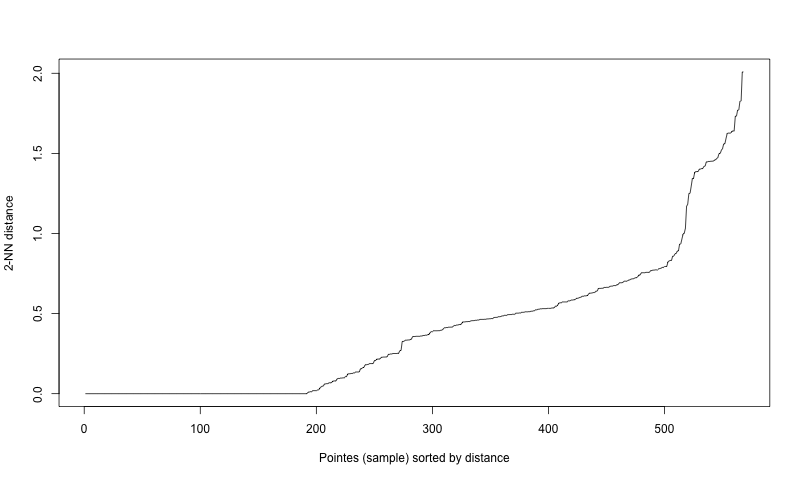

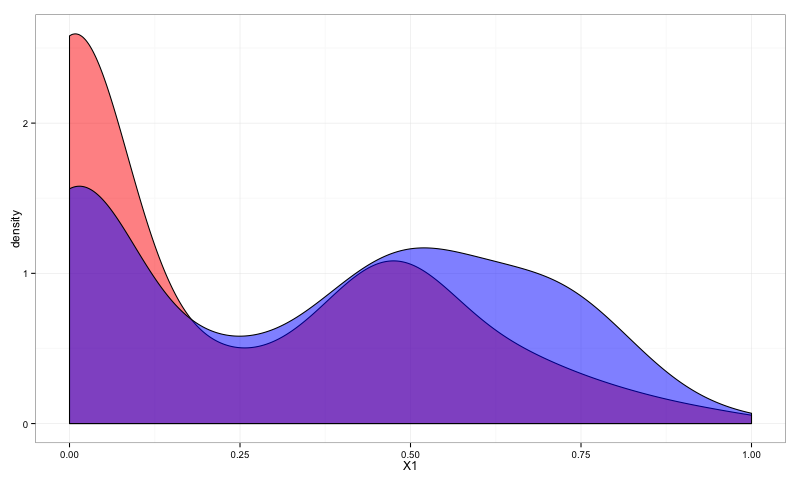

In [6]:
%%R -w 800
kNNdistplot(pomd, k=2, search="kd")
test<-kNNdist(pomd, k=2, search="kd")
df<-data.frame(test)

ggplot(df, aes(X1))+geom_density(fill="red", alpha=.5)+geom_density(fill="blue", alpha=0.5,aes(X2))+xlim(0,1)+theme_bw()

supposed to choose a cutoff at the "knee" of the knndistplot above.  That falls around 0.9.

In [7]:
%%R
mat_dbscan<-dbscan(pomd, eps=.9, minPts=2)
bray_clusters<-cbind.data.frame(rownames(phage_ortho), mat_dbscan$cluster)
colnames(bray_clusters)<-c("phage", "bray_clusters_eps0.9")
write.table(bray_clusters, "./data/bray_clusters_eps0.9_po1.txt", sep="\t", row.names=FALSE, quote=FALSE)

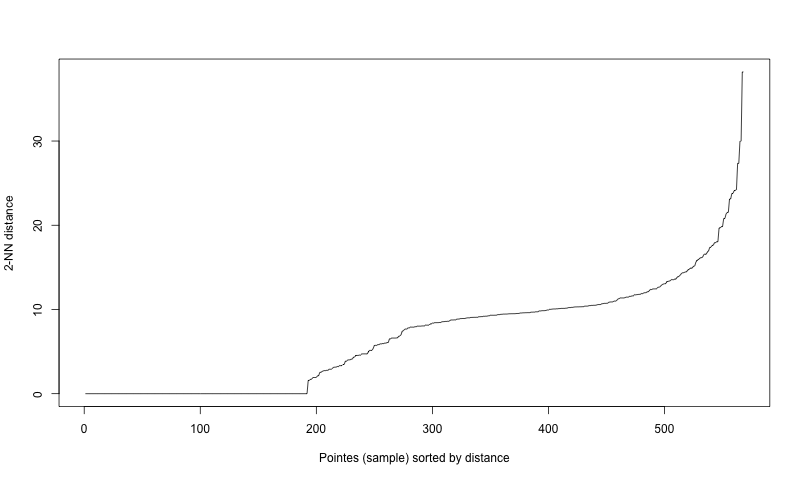

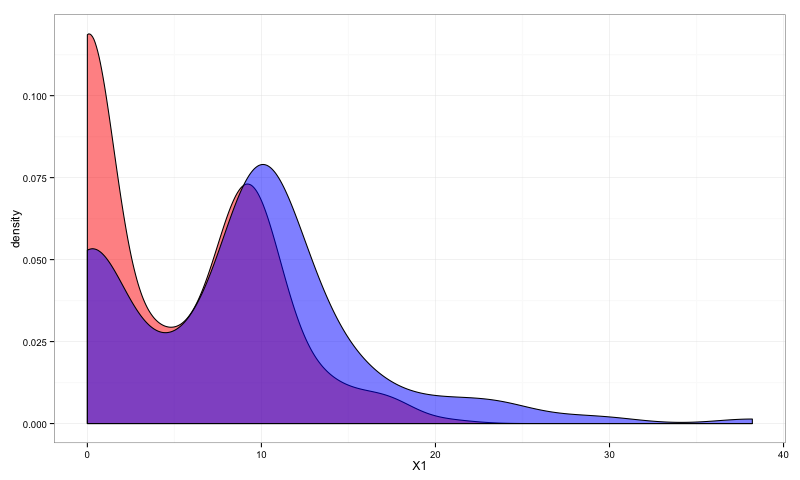

In [9]:
%%R -w 800
pomd<-vegdist(pom, method="euclidean", binary=TRUE)
kNNdistplot(pomd, k=2, search="kd")
test<-kNNdist(pomd, k=2, search="kd")
df<-data.frame(test)

ggplot(df, aes(X1))+geom_density(fill="red", alpha=.5)+geom_density(fill="blue", alpha=0.5,aes(X2))+theme_bw()

knee is now around 15 or so

In [11]:
%%R

mat_dbscan<-dbscan(pomd, eps=15, minPts=2)
euc_clusters<-cbind.data.frame(rownames(phage_ortho), mat_dbscan$cluster)

colnames(euc_clusters)<-c("phage", "euclidean_clusters_eps15")
write.table(euc_clusters, "./data/euc_clusters_eps15_po1.txt", sep="\t", row.names=FALSE, quote=FALSE)